<a href="https://colab.research.google.com/github/gomlfx/ApiaryFund/blob/master/autogluon_M1_next_day_graph_1_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install autogluon

     |████████████████████████████████| 52 kB 1.3 MB/s 
     |████████████████████████████████| 352 kB 11.9 MB/s 
     |████████████████████████████████| 56 kB 3.9 MB/s 
     |████████████████████████████████| 273 kB 44.5 MB/s 
     |████████████████████████████████| 27.4 MB 98.2 MB/s 
     |████████████████████████████████| 802 kB 54.3 MB/s 
     |████████████████████████████████| 4.2 MB 38.3 MB/s 
     |████████████████████████████████| 210 kB 32.4 MB/s 
     |████████████████████████████████| 131 kB 70.2 MB/s 
     |████████████████████████████████| 22.3 MB 63.6 MB/s 
     |████████████████████████████████| 1.3 MB 55.0 MB/s 
     |████████████████████████████████| 119 kB 54.8 MB/s 
     |████████████████████████████████| 3.0 MB 66.2 MB/s 
     |████████████████████████████████| 296 kB 59.8 MB/s 
     |████████████████████████████████| 2.0 MB 44.7 MB/s 
     |████████████████████████████████| 189 kB 58.0 MB/s 
     |████████████████████████████████| 67.3 MB 10 kB/s 
     |███████████

In [2]:
!pip install --upgrade mxnet

     |████████████████████████████████| 47.3 MB 85 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


In [3]:
import torch 

device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

Using cpu device


In [22]:
#designed for Jupyter/kaggle/colab
import pandas as pd
import numpy as np
#import matplotlib for plotting 
import matplotlib.pyplot as plt
%matplotlib inline
#import normalization
from sklearn import preprocessing

#autogluon
from autogluon.tabular import TabularDataset, TabularPredictor  

In [23]:
 #MT4 csv 
df=pd.read_csv('EURUSD1.csv', names=['d','t','eu_o','eu_h','eu_l','eu_c','eu_v']) 

In [24]:
df=pd.DataFrame(data=df.tail(70000))
df

,d,t,eu_o,eu_h,eu_l,eu_c,eu_v
0,2021.11.05,01:56,1.15533,1.15540,1.15533,1.15540,19
1,2021.11.05,01:57,1.15539,1.15540,1.15538,1.15540,10
2,2021.11.05,01:58,1.15540,1.15543,1.15535,1.15543,21
3,2021.11.05,01:59,1.15543,1.15548,1.15542,1.15548,6
4,2021.11.05,02:00,1.15548,1.15558,1.15547,1.15551,52
...,...,...,...,...,...,...,...
65850,2022.01.07,23:50,1.13612,1.13612,1.13600,1.13602,11
65851,2022.01.07,23:51,1.13601,1.13601,1.13590,1.13590,15
65852,2022.01.07,23:52,1.13590,1.13597,1.13586,1.13587,24
65853,2022.01.07,23:53,1.13588,1.13589,1.13582,1.13583,14


In [25]:
df = df.drop(['eu_v'], axis=1)

In [26]:
pd.set_option('display.max_columns', 100)
df 


,d,t,eu_o,eu_h,eu_l,eu_c
0,2021.11.05,01:56,1.15533,1.15540,1.15533,1.15540
1,2021.11.05,01:57,1.15539,1.15540,1.15538,1.15540
2,2021.11.05,01:58,1.15540,1.15543,1.15535,1.15543
3,2021.11.05,01:59,1.15543,1.15548,1.15542,1.15548
4,2021.11.05,02:00,1.15548,1.15558,1.15547,1.15551
...,...,...,...,...,...,...
65850,2022.01.07,23:50,1.13612,1.13612,1.13600,1.13602
65851,2022.01.07,23:51,1.13601,1.13601,1.13590,1.13590
65852,2022.01.07,23:52,1.13590,1.13597,1.13586,1.13587
65853,2022.01.07,23:53,1.13588,1.13589,1.13582,1.13583


In [27]:
df = df.drop(['d','t'], axis=1)

In [35]:
df40 = pd.DataFrame(data=df.iloc[-57600:-56160])
df40['row_num']=np.arange(len(df40))
df40.set_index('row_num',inplace=True)
df40 = df40.rename(columns={'eu_o':'eu_o_1','eu_h':'eu_h_1','eu_l':'eu_l_1','eu_c':'eu_c_1'})
print(df40)

df39 = pd.DataFrame(data=df.iloc[-56160:-54720])
df39['row_num']=np.arange(len(df39))
df39.set_index('row_num',inplace=True)
df39 = df39.rename(columns={'eu_o':'eu_o_1','eu_h':'eu_h_1','eu_l':'eu_l_1','eu_c':'eu_c_1'})
print(df39)

df38 = pd.DataFrame(data=df.iloc[-54720:-53280])
df38['row_num']=np.arange(len(df38))
df38.set_index('row_num',inplace=True)
df38 = df38.rename(columns={'eu_o':'eu_o_1','eu_h':'eu_h_1','eu_l':'eu_l_1','eu_c':'eu_c_1'})
print(df38)

df37 = pd.DataFrame(data=df.iloc[-53280:-51840])
df37['row_num']=np.arange(len(df37))
df37.set_index('row_num',inplace=True)
df37 = df37.rename(columns={'eu_o':'eu_o_1','eu_h':'eu_h_1','eu_l':'eu_l_1','eu_c':'eu_c_1'})
print(df37)

df36 = pd.DataFrame(data=df.iloc[-51840:-50400])
df36['row_num']=np.arange(len(df36))
df36.set_index('row_num',inplace=True)
df36 = df36.rename(columns={'eu_o':'eu_o_1','eu_h':'eu_h_1','eu_l':'eu_l_1','eu_c':'eu_c_1'})
print(df36)

df35 = pd.DataFrame(data=df.iloc[-50400:-48960])
df35['row_num']=np.arange(len(df35))
df35.set_index('row_num',inplace=True)
df35 = df35.rename(columns={'eu_o':'eu_o_1','eu_h':'eu_h_1','eu_l':'eu_l_1','eu_c':'eu_c_1'})
print(df35)

df34 = pd.DataFrame(data=df.iloc[-48960:-47520])
df34['row_num']=np.arange(len(df34))
df34.set_index('row_num',inplace=True)
df34 = df34.rename(columns={'eu_o':'eu_o_1','eu_h':'eu_h_1','eu_l':'eu_l_1','eu_c':'eu_c_1'})
print(df34)

df33 = pd.DataFrame(data=df.iloc[-47520:-46080])
df33['row_num']=np.arange(len(df33))
df33.set_index('row_num',inplace=True)
df33 = df33.rename(columns={'eu_o':'eu_o_1','eu_h':'eu_h_1','eu_l':'eu_l_1','eu_c':'eu_c_1'})
print(df33)

df32 = pd.DataFrame(data=df.iloc[-46080:-44640])
df32['row_num']=np.arange(len(df32))
df32.set_index('row_num',inplace=True)
df32 = df32.rename(columns={'eu_o':'eu_o_32','eu_h':'eu_h_32','eu_l':'eu_l_32','eu_c':'eu_c_32'})
print(df32)

df31 = pd.DataFrame(data=df.iloc[-44640:-43200])
df31['row_num']=np.arange(len(df31))
df31.set_index('row_num',inplace=True)
df31 = df31.rename(columns={'eu_o':'eu_o_31','eu_h':'eu_h_31','eu_l':'eu_l_31','eu_c':'eu_c_31'})
print(df31)

df30 = pd.DataFrame(data=df.iloc[-43200:-41760])
df30['row_num']=np.arange(len(df30))
df30.set_index('row_num',inplace=True)
df30 = df30.rename(columns={'eu_o':'eu_o_30','eu_h':'eu_h_30','eu_l':'eu_l_30','eu_c':'eu_c_30'})
print(df30)

df29 = pd.DataFrame(data=df.iloc[-41760:-40320])
df29['row_num']=np.arange(len(df29))
df29.set_index('row_num',inplace=True)
df29 = df29.rename(columns={'eu_o':'eu_o_29','eu_h':'eu_h_29','eu_l':'eu_l_29','eu_c':'eu_c_29'})
print(df29)

df28 = pd.DataFrame(data=df.iloc[-40320:-38880])
df28['row_num']=np.arange(len(df28))
df28.set_index('row_num',inplace=True)
df28 = df28.rename(columns={'eu_o':'eu_o_28','eu_h':'eu_h_28','eu_l':'eu_l_28','eu_c':'eu_c_28'})
print(df28)

df27 = pd.DataFrame(data=df.iloc[-38880:-37440])
df27['row_num']=np.arange(len(df27))
df27.set_index('row_num',inplace=True)
df27 = df27.rename(columns={'eu_o':'eu_o_27','eu_h':'eu_h_27','eu_l':'eu_l_27','eu_c':'eu_c_27'})
print(df27)

df26 = pd.DataFrame(data=df.iloc[-37440:-36000])
df26['row_num']=np.arange(len(df26))
df26.set_index('row_num',inplace=True)
df26 = df26.rename(columns={'eu_o':'eu_o_26','eu_h':'eu_h_26','eu_l':'eu_l_26','eu_c':'eu_c_26'})
print(df26)

df25 = pd.DataFrame(data=df.iloc[-36000:-34560])
df25['row_num']=np.arange(len(df25))
df25.set_index('row_num',inplace=True)
df25 = df25.rename(columns={'eu_o':'eu_o_25','eu_h':'eu_h_25','eu_l':'eu_l_25','eu_c':'eu_c_25'})
print(df25)

df24 = pd.DataFrame(data=df.iloc[-34560:-33120])
df24['row_num']=np.arange(len(df24))
df24.set_index('row_num',inplace=True)
df24 = df24.rename(columns={'eu_o':'eu_o_24','eu_h':'eu_h_24','eu_l':'eu_l_24','eu_c':'eu_c_24'})
print(df24)

df23 = pd.DataFrame(data=df.iloc[-33120:-31680])
df23['row_num']=np.arange(len(df23))
df23.set_index('row_num',inplace=True)
df23 = df23.rename(columns={'eu_o':'eu_o_23','eu_h':'eu_h_23','eu_l':'eu_l_23','eu_c':'eu_c_23'})
print(df23)

df22 = pd.DataFrame(data=df.iloc[-31680:-30240])
df22['row_num']=np.arange(len(df22))
df22.set_index('row_num',inplace=True)
df22 = df22.rename(columns={'eu_o':'eu_o_22','eu_h':'eu_h_22','eu_l':'eu_l_22','eu_c':'eu_c_22'})
print(df22)

df21 = pd.DataFrame(data=df.iloc[-30240:-28800])
df21['row_num']=np.arange(len(df21))
df21.set_index('row_num',inplace=True)
df21 = df21.rename(columns={'eu_o':'eu_o_21','eu_h':'eu_h_21','eu_l':'eu_l_21','eu_c':'eu_c_21'})
print(df21)


df20 = pd.DataFrame(data=df.iloc[-28800:-27360])
df20['row_num']=np.arange(len(df20))
df20.set_index('row_num',inplace=True)
df20 = df20.rename(columns={'eu_o':'eu_o_20','eu_h':'eu_h_20','eu_l':'eu_l_20','eu_c':'eu_c_20'})
print(df20)

df19 = pd.DataFrame(data=df.iloc[-27360:-25920])
df19['row_num']=np.arange(len(df19))
df19.set_index('row_num',inplace=True)
df19 = df19.rename(columns={'eu_o':'eu_o_19','eu_h':'eu_h_19','eu_l':'eu_l_19','eu_c':'eu_c_19'})
print(df19)

df18 = pd.DataFrame(data=df.iloc[-25920:-24480])
df18['row_num']=np.arange(len(df18))
df18.set_index('row_num',inplace=True)
df18 = df18.rename(columns={'eu_o':'eu_o_18','eu_h':'eu_h_18','eu_l':'eu_l_18','eu_c':'eu_c_18'})
print(df18)

df17 = pd.DataFrame(data=df.iloc[-24480:-23040])
df17['row_num']=np.arange(len(df17))
df17.set_index('row_num',inplace=True)
df17 = df17.rename(columns={'eu_o':'eu_o_17','eu_h':'eu_h_17','eu_l':'eu_l_17','eu_c':'eu_c_17'})
print(df17)

df16 = pd.DataFrame(data=df.iloc[-23040:-21600])
df16['row_num']=np.arange(len(df16))
df16.set_index('row_num',inplace=True)
df16 = df16.rename(columns={'eu_o':'eu_o_16','eu_h':'eu_h_16','eu_l':'eu_l_16','eu_c':'eu_c_16'})
print(df16)

df15 = pd.DataFrame(data=df.iloc[-21600:-20160])
df15['row_num']=np.arange(len(df15))
df15.set_index('row_num',inplace=True)
df15 = df15.rename(columns={'eu_o':'eu_o_15','eu_h':'eu_h_15','eu_l':'eu_l_15','eu_c':'eu_c_15'})
print(df15)

df14 = pd.DataFrame(data=df.iloc[-20160:-18720])
df14['row_num']=np.arange(len(df14))
df14.set_index('row_num',inplace=True)
df14 = df14.rename(columns={'eu_o':'eu_o_14','eu_h':'eu_h_14','eu_l':'eu_l_14','eu_c':'eu_c_14'})
print(df14)

df13 = pd.DataFrame(data=df.iloc[-18720:-17280])
df13['row_num']=np.arange(len(df13))
df13.set_index('row_num',inplace=True)
df13 = df13.rename(columns={'eu_o':'eu_o_13','eu_h':'eu_h_13','eu_l':'eu_l_13','eu_c':'eu_c_13'})
print(df13)

df12 = pd.DataFrame(data=df.iloc[-17280:-15840])
df12['row_num']=np.arange(len(df12))
df12.set_index('row_num',inplace=True)
df12 = df12.rename(columns={'eu_o':'eu_o_12','eu_h':'eu_h_12','eu_l':'eu_l_12','eu_c':'eu_c_12'})
print(df12)

df11 = pd.DataFrame(data=df.iloc[-15840:-14400])
df11['row_num']=np.arange(len(df11))
df11.set_index('row_num',inplace=True)
df11 = df11.rename(columns={'eu_o':'eu_o_11','eu_h':'eu_h_11','eu_l':'eu_l_11','eu_c':'eu_c_11'})
print(df11)

df10 = pd.DataFrame(data=df.iloc[-14400:-12960])
df10['row_num']=np.arange(len(df10))
df10.set_index('row_num',inplace=True)
df10 = df10.rename(columns={'eu_o':'eu_o_10','eu_h':'eu_h_10','eu_l':'eu_l_10','eu_c':'eu_c_10'})
print(df10)

df9 = pd.DataFrame(data=df.iloc[-12960:-11520])
df9['row_num']=np.arange(len(df9))
df9.set_index('row_num',inplace=True)
df9 = df9.rename(columns={'eu_o':'eu_o_9','eu_h':'eu_h_9','eu_l':'eu_l_9','eu_c':'eu_c_9'})
print(df9)

df8 = pd.DataFrame(data=df.iloc[-11520:-10080])
df8['row_num']=np.arange(len(df8))
df8.set_index('row_num',inplace=True)
df8 = df8.rename(columns={'eu_o':'eu_o_8','eu_h':'eu_h_8','eu_l':'eu_l_8','eu_c':'eu_c_8'})
print(df8)

df7 = pd.DataFrame(data=df.iloc[-10080:-8640])
df7['row_num']=np.arange(len(df7))
df7.set_index('row_num',inplace=True)
df7 = df7.rename(columns={'eu_o':'eu_o_7','eu_h':'eu_h_7','eu_l':'eu_l_7','eu_c':'eu_c_7'})
print(df7)

df6 = pd.DataFrame(data=df.iloc[-8640:-7200])
df6['row_num']=np.arange(len(df6))
df6.set_index('row_num',inplace=True)
df6 = df6.rename(columns={'eu_o':'eu_o_6','eu_h':'eu_h_6','eu_l':'eu_l_6','eu_c':'eu_c_6'})
print(df6)

df5 = pd.DataFrame(data=df.iloc[-7200:-5760])
df5['row_num']=np.arange(len(df5))
df5.set_index('row_num',inplace=True)
df5 = df5.rename(columns={'eu_o':'eu_o_5','eu_h':'eu_h_5','eu_l':'eu_l_5','eu_c':'eu_c_5'})
print(df5)

df4 = pd.DataFrame(data=df.iloc[-5760:-4320])
df4['row_num']=np.arange(len(df4))
df4.set_index('row_num',inplace=True)
df4 = df4.rename(columns={'eu_o':'eu_o_4','eu_h':'eu_h_4','eu_l':'eu_l_4','eu_c':'eu_c_4'})
print(df4)

df3 = pd.DataFrame(data=df.iloc[-4320:-2880])
df3['row_num']=np.arange(len(df3))
df3.set_index('row_num',inplace=True)
df3 = df3.rename(columns={'eu_o':'eu_o_3','eu_h':'eu_h_3','eu_l':'eu_l_3','eu_c':'eu_c_3'})
print(df3)

df2 = pd.DataFrame(data=df.iloc[-2880:-1440])
df2['row_num']=np.arange(len(df2))
df2.set_index('row_num',inplace=True)
df2 = df2.rename(columns={'eu_o':'eu_o_2','eu_h':'eu_h_2','eu_l':'eu_l_2','eu_c':'eu_c_2'})
print(df2)

df1 = pd.DataFrame(data=df.iloc[-1440:])
df1['row_num']=np.arange(len(df1))
df1.set_index('row_num',inplace=True)
df1 = df1.rename(columns={'eu_o':'eu_o_1','eu_h':'eu_h_1','eu_l':'eu_l_1','eu_c':'eu_c_1'})
print(df1)


            eu_o     eu_h     eu_l   day_40
row_num                                    
0        1.14485  1.14489  1.14480  1.14484
1        1.14484  1.14484  1.14479  1.14481
2        1.14480  1.14487  1.14477  1.14487
3        1.14487  1.14487  1.14474  1.14474
4        1.14476  1.14480  1.14473  1.14477
...          ...      ...      ...      ...
1435     1.13817  1.13827  1.13814  1.13826
1436     1.13825  1.13841  1.13825  1.13828
1437     1.13828  1.13830  1.13824  1.13830
1438     1.13828  1.13835  1.13827  1.13830
1439     1.13831  1.13837  1.13823  1.13834

[1440 rows x 4 columns]
            eu_o     eu_h     eu_l   day_39
row_num                                    
0        1.13834  1.13847  1.13834  1.13846
1        1.13846  1.13853  1.13846  1.13847
2        1.13846  1.13850  1.13831  1.13836
3        1.13836  1.13836  1.13828  1.13835
4        1.13835  1.13839  1.13829  1.13834
...          ...      ...      ...      ...
1435     1.13311  1.13312  1.13279  1.13286
1436   

In [29]:
df_train = pd.concat([
                      df40,df39,df38,df37,df36,df35,df34,df33,df32,df31,df30,df29,df28,df27,df26,df25,df24,df23,df22,df21,
                      df20,df19,df18,df17,df16,df15,df14,df13,df12,df11,
                      df10,df9,df8,df7,df6,df5,df4,df3,df2,df1], axis=1)
df_train = pd.DataFrame(data=df_train)
df_train


,eu_o,eu_h,eu_l,day_40,eu_o,eu_h,eu_l,day_39,eu_o,eu_h,eu_l,day_38,eu_o,eu_h,eu_l,day_37,eu_o,eu_h,eu_l,day_36,eu_o,eu_h,eu_l,day_35,eu_o,eu_h,eu_l,day_34,eu_o,eu_h,eu_l,day_33,eu_o,eu_h,eu_l,day_32,eu_o,eu_h,eu_l,day_31,eu_o,eu_h,eu_l,day_30,eu_o,eu_h,eu_l,day_29,eu_o,eu_h,...,eu_l,day_13,eu_o,eu_h,eu_l,day_12,eu_o,eu_h,eu_l,day_11,eu_o,eu_h,eu_l,day_10,eu_o,eu_h,eu_l,day_9,eu_o,eu_h,eu_l,day_8,eu_o,eu_h,eu_l,day_7,eu_o,eu_h,eu_l,day_6,eu_o,eu_h,eu_l,day_5,eu_o,eu_h,eu_l,day_4,eu_o,eu_h,eu_l,day_3,eu_o,eu_h,eu_l,day_2,eu_o,eu_h,eu_l,day_1
row_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.14485,1.14489,1.14480,1.14484,1.13834,1.13847,1.13834,1.13846,1.13283,1.13293,1.13279,1.13279,1.13166,1.13170,1.13159,1.13170,1.13686,1.13686,1.13673,1.13673,1.12892,1.12892,1.12881,1.12889,1.12399,1.12399,1.12389,1.12396,1.12493,1.12493,1.12475,1.12485,1.11932,1.11932,1.11925,1.11926,1.12075,1.12078,1.12068,1.12069,1.13113,1.13114,1.13105,1.13105,1.12671,1.12675,1.12669,1.12671,1.13112,1.13114,...,1.12809,1.12811,1.13279,1.13281,1.13279,1.13280,1.13324,1.13325,1.13321,1.13321,1.13154,1.13157,1.13154,1.13156,1.13260,1.13266,1.13259,1.13262,1.13036,1.13055,1.13031,1.13055,1.13430,1.13431,1.13429,1.13429,1.13220,1.13220,1.13216,1.13220,1.13837,1.13838,1.13825,1.13828,1.12964,1.12964,1.12963,1.12963,1.12829,1.12830,1.12828,1.12830,1.13118,1.13123,1.13115,1.13120,1.12972,1.12972,1.12968,1.12971
1,1.14484,1.14484,1.14479,1.14481,1.13846,1.13853,1.13846,1.13847,1.13281,1.13286,1.13278,1.13285,1.13168,1.13169,1.13162,1.13162,1.13673,1.13677,1.13667,1.13670,1.12889,1.12889,1.12880,1.12885,1.12396,1.12403,1.12395,1.12402,1.12484,1.12487,1.12481,1.12487,1.11927,1.11951,1.11924,1.11943,1.12069,1.12084,1.12069,1.12084,1.13103,1.13113,1.13101,1.13113,1.12670,1.12675,1.12670,1.12675,1.13112,1.13135,...,1.12801,1.12802,1.13279,1.13285,1.13278,1.13284,1.13322,1.13327,1.13322,1.13322,1.13159,1.13159,1.13155,1.13155,1.13261,1.13266,1.13255,1.13256,1.13052,1.13053,1.13046,1.13049,1.13429,1.13429,1.13429,1.13429,1.13221,1.13230,1.13221,1.13228,1.13829,1.13830,1.13816,1.13818,1.12964,1.12964,1.12961,1.12961,1.12829,1.12829,1.12829,1.12829,1.13121,1.13123,1.13120,1.13120,1.12971,1.12977,1.12971,1.12974
2,1.14480,1.14487,1.14477,1.14487,1.13846,1.13850,1.13831,1.13836,1.13285,1.13285,1.13272,1.13274,1.13163,1.13173,1.13158,1.13166,1.13669,1.13677,1.13666,1.13674,1.12888,1.12888,1.12871,1.12878,1.12400,1.12409,1.12399,1.12407,1.12488,1.12492,1.12486,1.12486,1.11943,1.11949,1.11928,1.11928,1.12084,1.12088,1.12084,1.12086,1.13112,1.13122,1.13112,1.13117,1.12672,1.12676,1.12672,1.12676,1.13132,1.13134,...,1.12799,1.12802,1.13284,1.13286,1.13279,1.13279,1.13323,1.13324,1.13317,1.13317,1.13156,1.13161,1.13155,1.13161,1.13255,1.13255,1.13246,1.13247,1.13048,1.13050,1.13046,1.13049,1.13430,1.13432,1.13430,1.13431,1.13227,1.13227,1.13222,1.13223,1.13816,1.13817,1.13801,1.13801,1.12962,1.12965,1.12961,1.12963,1.12829,1.12829,1.12827,1.12829,1.13121,1.13122,1.13119,1.13121,1.12973,1.12973,1.12967,1.12971
3,1.14487,1.14487,1.14474,1.14474,1.13836,1.13836,1.13828,1.13835,1.13274,1.13274,1.13272,1.13274,1.13166,1.13179,1.13160,1.13176,1.13676,1.13685,1.13674,1.13680,1.12875,1.12891,1.12875,1.12882,1.12405,1.12407,1.12399,1.12402,1.12486,1.12494,1.12486,1.12491,1.11928,1.11957,1.11920,1.11943,1.12086,1.12088,1.12085,1.12086,1.13116,1.13116,1.13110,1.13110,1.12677,1.12688,1.12677,1.12683,1.13121,1.13125,...,1.12800,1.12801,1.13279,1.13281,1.13279,1.13280,1.13319,1.13323,1.13316,1.13316,1.13160,1.13161,1.13160,1.13161,1.13246,1.13250,1.13235,1.13235,1.13048,1.13050,1.13048,1.13050,1.13431,1.13436,1.13429,1.13432,1.13222,1.13224,1.13221,1.13224,1.13801,1.13801,1.13795,1.13797,1.12962,1.12963,1.12960,1.12963,1.12829,1.12833,1.12829,1.12833,1.13120,1.13123,1.13120,1.13123,1.12973,1.12980,1.12969,1.12980
4,1.14476,1.14480,1.14473,1.14477,1.13835,1.13839,1.13829,1.13834,1.13274,1.13274,1.13262,1.13264,1.13176,1.13178,1.13171

In [30]:
df_test = pd.concat([
                     df39,df38,df37,df36,df35,df34,df33,df32,df31,df30,df29,df28,df27,df26,df25,df24,df23,df22,df21,df20,
                     df19,df18,df17,df16,df15,df14,df13,df12,df11,df10,
                     df9,df8,df7,df6,df5,df4,df3,df2,df1], axis=1)
df_test['pred_col'] =0
df_test.rename(columns={'day_39':'day_40','day_38':'day_39','day_37':'day_38','day_36':'day_37','day_35':'day_36','day_34':'day_35','day_33':'day_34','day_32':'day_33','day_31':'day_32','day_30':'day_31','day_29':'day_30','day_28':'day_29','day_27':'day_28','day_26':'day_27','day_25':'day_26','day_24':'day_25','day_23':'day_24','day_22':'day_23','day_21':'day_22','day_20':'day_21','day_19':'day_20','day_18':'day_19','day_17':'day_18','day_16':'day_17','day_15':'day_16','day_14':'day_15','day_13':'day_14','day_12':'day_13','day_11':'day_12','day_10':'day_11','day_9':'day_10','day_8':'day_9','day_7':'day_8','day_6':'day_7','day_5':'day_6','day_4':'day_5','day_3': 'day_4', 'day_2': 'day_3','day_1':'day_2','pred_col':'day_1'}, inplace=True)
df_test = pd.DataFrame(data=df_test)
df_test

,eu_o,eu_h,eu_l,day_40,eu_o,eu_h,eu_l,day_39,eu_o,eu_h,eu_l,day_38,eu_o,eu_h,eu_l,day_37,eu_o,eu_h,eu_l,day_36,eu_o,eu_h,eu_l,day_35,eu_o,eu_h,eu_l,day_34,eu_o,eu_h,eu_l,day_33,eu_o,eu_h,eu_l,day_32,eu_o,eu_h,eu_l,day_31,eu_o,eu_h,eu_l,day_30,eu_o,eu_h,eu_l,day_29,eu_o,eu_h,...,day_14,eu_o,eu_h,eu_l,day_13,eu_o,eu_h,eu_l,day_12,eu_o,eu_h,eu_l,day_11,eu_o,eu_h,eu_l,day_10,eu_o,eu_h,eu_l,day_9,eu_o,eu_h,eu_l,day_8,eu_o,eu_h,eu_l,day_7,eu_o,eu_h,eu_l,day_6,eu_o,eu_h,eu_l,day_5,eu_o,eu_h,eu_l,day_4,eu_o,eu_h,eu_l,day_3,eu_o,eu_h,eu_l,day_2,day_1
row_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.13834,1.13847,1.13834,1.13846,1.13283,1.13293,1.13279,1.13279,1.13166,1.13170,1.13159,1.13170,1.13686,1.13686,1.13673,1.13673,1.12892,1.12892,1.12881,1.12889,1.12399,1.12399,1.12389,1.12396,1.12493,1.12493,1.12475,1.12485,1.11932,1.11932,1.11925,1.11926,1.12075,1.12078,1.12068,1.12069,1.13113,1.13114,1.13105,1.13105,1.12671,1.12675,1.12669,1.12671,1.13112,1.13114,1.13103,1.13111,1.13233,1.13233,...,1.12811,1.13279,1.13281,1.13279,1.13280,1.13324,1.13325,1.13321,1.13321,1.13154,1.13157,1.13154,1.13156,1.13260,1.13266,1.13259,1.13262,1.13036,1.13055,1.13031,1.13055,1.13430,1.13431,1.13429,1.13429,1.13220,1.13220,1.13216,1.13220,1.13837,1.13838,1.13825,1.13828,1.12964,1.12964,1.12963,1.12963,1.12829,1.12830,1.12828,1.12830,1.13118,1.13123,1.13115,1.13120,1.12972,1.12972,1.12968,1.12971,0
1,1.13846,1.13853,1.13846,1.13847,1.13281,1.13286,1.13278,1.13285,1.13168,1.13169,1.13162,1.13162,1.13673,1.13677,1.13667,1.13670,1.12889,1.12889,1.12880,1.12885,1.12396,1.12403,1.12395,1.12402,1.12484,1.12487,1.12481,1.12487,1.11927,1.11951,1.11924,1.11943,1.12069,1.12084,1.12069,1.12084,1.13103,1.13113,1.13101,1.13113,1.12670,1.12675,1.12670,1.12675,1.13112,1.13135,1.13110,1.13132,1.13211,1.13211,...,1.12802,1.13279,1.13285,1.13278,1.13284,1.13322,1.13327,1.13322,1.13322,1.13159,1.13159,1.13155,1.13155,1.13261,1.13266,1.13255,1.13256,1.13052,1.13053,1.13046,1.13049,1.13429,1.13429,1.13429,1.13429,1.13221,1.13230,1.13221,1.13228,1.13829,1.13830,1.13816,1.13818,1.12964,1.12964,1.12961,1.12961,1.12829,1.12829,1.12829,1.12829,1.13121,1.13123,1.13120,1.13120,1.12971,1.12977,1.12971,1.12974,0
2,1.13846,1.13850,1.13831,1.13836,1.13285,1.13285,1.13272,1.13274,1.13163,1.13173,1.13158,1.13166,1.13669,1.13677,1.13666,1.13674,1.12888,1.12888,1.12871,1.12878,1.12400,1.12409,1.12399,1.12407,1.12488,1.12492,1.12486,1.12486,1.11943,1.11949,1.11928,1.11928,1.12084,1.12088,1.12084,1.12086,1.13112,1.13122,1.13112,1.13117,1.12672,1.12676,1.12672,1.12676,1.13132,1.13134,1.13118,1.13119,1.13199,1.13199,...,1.12802,1.13284,1.13286,1.13279,1.13279,1.13323,1.13324,1.13317,1.13317,1.13156,1.13161,1.13155,1.13161,1.13255,1.13255,1.13246,1.13247,1.13048,1.13050,1.13046,1.13049,1.13430,1.13432,1.13430,1.13431,1.13227,1.13227,1.13222,1.13223,1.13816,1.13817,1.13801,1.13801,1.12962,1.12965,1.12961,1.12963,1.12829,1.12829,1.12827,1.12829,1.13121,1.13122,1.13119,1.13121,1.12973,1.12973,1.12967,1.12971,0
3,1.13836,1.13836,1.13828,1.13835,1.13274,1.13274,1.13272,1.13274,1.13166,1.13179,1.13160,1.13176,1.13676,1.13685,1.13674,1.13680,1.12875,1.12891,1.12875,1.12882,1.12405,1.12407,1.12399,1.12402,1.12486,1.12494,1.12486,1.12491,1.11928,1.11957,1.11920,1.11943,1.12086,1.12088,1.12085,1.12086,1.13116,1.13116,1.13110,1.13110,1.12677,1.12688,1.12677,1.12683,1.13121,1.13125,1.13116,1.13125,1.13183,1.13186,...,1.12801,1.13279,1.13281,1.13279,1.13280,1.13319,1.13323,1.13316,1.13316,1.13160,1.13161,1.13160,1.13161,1.13246,1.13250,1.13235,1.13235,1.13048,1.13050,1.13048,1.13050,1.13431,1.13436,1.13429,1.13432,1.13222,1.13224,1.13221,1.13224,1.13801,1.13801,1.13795,1.13797,1.12962,1.12963,1.12960,1.12963,1.12829,1.12833,1.12829,1.12833,1.13120,1.13123,1.13120,1.13123,1.12973,1.12980,1.12969,1.12980,0
4,1.13835,1.13839,1.13829,1.13834,1.13274,1.13274,1.13262,1.13264,1.13176,1.13178,1.13171,1.13172,1.13680,1.13681,1.13673,1.13674,1.12882,1.128

In [31]:
#predict new interval
label_new_interval = 'day_1' 
print("Summary of class variable: \n", df_train[label_new_interval].describe())

Summary of class variable: 
 count    1440.000000
mean        1.131754
std         0.002459
min         1.128990
25%         1.129890
50%         1.130330
75%         1.134342
max         1.136450
Name: day_1, dtype: float64


In [32]:
#predict new interval
save_path='agModels-predict_day1'
predictor = TabularPredictor(label=label_new_interval, path=save_path)
predictor.fit(df_train) #presets='best_quality')
#.fit(presets='best_quality) is slower

ValueError: ignored

In [17]:
#contrast leaderboard result of train and test data
predictor.leaderboard(df_train, silent=True)

,model,score_test,score_val,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,KNeighborsDist_BAG_L1,-3.404837e-08,-0.000117,0.156925,0.136758,0.010397,0.156925,0.136758,0.010397,1,True,2
1,LightGBMLarge_BAG_L1,-1.699094e-05,-0.000129,5.128603,0.500510,178.076573,5.128603,0.500510,178.076573,1,True,11
2,WeightedEnsemble_L2,-1.707547e-05,-0.000114,17.164798,4.035042,802.701746,0.006263,0.001091,0.495958,2,True,12
3,CatBoost_BAG_L1,-2.415598e-05,-0.000131,0.141720,0.046766,309.934420,0.141720,0.046766,309.934420,1,True,6
4,LightGBM_BAG_L2,-2.861537e-05,-0.000123,19.541461,4.910373,869.625879,1.035541,0.126400,34.123357,2,True,14
5,LightGBMXT_BAG_L1,-2.881860e-05,-0.000127,5.028640,0.776611,59.164810,5.028640,0.776611,59.164810,1,True,3
6,LightGBM_BAG_L1,-2.912294e-05,-0.000133,4.118935,0.630199,75.228442,4.118935,0.630199,75.228442,1,True,4
7,LightGBMLarge_BAG_L2,-2.956108e-05,-0.000123,20.449013,4.989257,946.917264,1.943093,0.205284,111.414742,2,True,21
8,RandomForestMSE_BAG_L2,-3.152567e-05,-0.000120,18.665868,4.944206,843.773041,0.159948,0.160233,8.270519,2,True,15
9,LightGBMXT_BAG_L2,-3.511722e-05,-0.000125,24.473184,5.384084,886.468021,5.967264,0.600111,50.965498,2,True,13


In [18]:
#predictor.feature_importance(data=df_train)

In [19]:
#predict close
test_data = TabularDataset(df_test)
y_test = df_test[label_new_interval]
test_data_nolab = df_test.drop(columns=[label_new_interval])
test_data_nolab 

,day_40,day_39,day_38,day_37,day_36,day_35,day_34,day_33,day_32,day_31,day_30,day_29,day_28,day_27,day_26,day_25,day_24,day_23,day_22,day_21,day_20,day_19,day_18,day_17,day_16,day_15,day_14,day_13,day_12,day_11,day_10,day_9,day_8,day_7,day_6,day_5,day_4,day_3,day_2
row_num,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,1.13846,1.13279,1.13170,1.13673,1.12889,1.12396,1.12485,1.11926,1.12069,1.13105,1.12671,1.13111,1.13211,1.13065,1.13258,1.12827,1.12557,1.13483,1.12905,1.13114,1.12928,1.12625,1.12331,1.13227,1.12544,1.12848,1.12811,1.13280,1.13321,1.13156,1.13262,1.13055,1.13429,1.13220,1.13828,1.12963,1.12830,1.13120,1.12971
1,1.13847,1.13285,1.13162,1.13670,1.12885,1.12402,1.12487,1.11943,1.12084,1.13113,1.12675,1.13132,1.13199,1.13069,1.13251,1.12833,1.12562,1.13490,1.12909,1.13113,1.12924,1.12624,1.12315,1.13241,1.12555,1.12848,1.12802,1.13284,1.13322,1.13155,1.13256,1.13049,1.13429,1.13228,1.13818,1.12961,1.12829,1.13120,1.12974
2,1.13836,1.13274,1.13166,1.13674,1.12878,1.12407,1.12486,1.11928,1.12086,1.13117,1.12676,1.13119,1.13183,1.13065,1.13246,1.12832,1.12558,1.13484,1.12914,1.13106,1.12918,1.12610,1.12334,1.13245,1.12559,1.12838,1.12802,1.13279,1.13317,1.13161,1.13247,1.13049,1.13431,1.13223,1.13801,1.12963,1.12829,1.13121,1.12971
3,1.13835,1.13274,1.13176,1.13680,1.12882,1.12402,1.12491,1.11943,1.12086,1.13110,1.12683,1.13125,1.13166,1.13067,1.13233,1.12834,1.12559,1.13478,1.12908,1.13108,1.12920,1.12606,1.12292,1.13239,1.12571,1.12851,1.12801,1.13280,1.13316,1.13161,1.13235,1.13050,1.13432,1.13224,1.13797,1.12963,1.12833,1.13123,1.12980
4,1.13834,1.13264,1.13172,1.13674,1.12889,1.12400,1.12502,1.11935,1.12086,1.13111,1.12687,1.13109,1.13169,1.13074,1.13236,1.12833,1.12565,1.13471,1.12909,1.13108,1.12917,1.12594,1.12288,1.13238,1.12570,1.12839,1.12801,1.13282,1.13312,1.13167,1.13245,1.13049,1.13426,1.13228,1.13784,1.12967,1.12834,1.13123,1.12982
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1.13286,1.13163,1.13685,1.12898,1.12390,1.12501,1.11936,1.12090,1.13091,1.12659,1.13090,1.13249,1.13076,1.13259,1.12812,1.12526,1.13491,1.12913,1.13116,1.12916,1.12599,1.12284,1.13204,1.12560,1.12858,1.12793,1.13279,1.13329,1.13144,1.13258,1.13030,1.13436,1.13221,1.13839,1.12970,1.12827,1.13129,1.12958,1.13602
1436,1.13299,1.13155,1.13682,1.12895,1.12402,1.12513,1.11935,1.12091,1.13086,1.12658,1.13099,1.13235,1.13074,1.13257,1.12810,1.12539,1.13487,1.12917,1.13120,1.12918,1.12600,1.12290,1.13212,1.12568,1.12858,1.12803,1.13280,1.13326,1.13152,1.13263,1.13032,1.13434,1.13217,1.13832,1.12970,1.12821,1.13124,1.12969,1.13590
1437,1.13287,1.13147,1.13689,1.12896,1.12406,1.12496,1.11930,1.12085,1.13094,1.12664,1.13114,1.13241,1.13075,1.13256,1.12816,1.12540,1.13491,1.12920,1.13122,1.12916,1.12606,1.12259,1.13209,1.12558,1.12849,1.12800,1.13278,1.13327,1.13156,1.13265,1.13030,1.13433,1.13216,1.13838,1.12966,1.12823,1.13124,1.12971,1.13587


In [20]:
#predict new interval
predictor = TabularPredictor.load(save_path)
y_pred = predictor.predict(test_data_nolab)
print("Predictions: \n", y_pred)
perf = predictor.evaluate_predictions(y_true = y_test, y_pred = y_pred, auxiliary_metrics=True)

/usr/local/lib/python3.7/dist-packages/scipy/stats/stats.py:3913: PearsonRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(PearsonRConstantInputWarning())
Evaluation: root_mean_squared_error on test data: -1.1347095074104414
	Note: Scores are always higher_is_better. This metric score can be multiplied by -1 to get the metric value.
Evaluations on test data:
{
    "root_mean_squared_error": -1.1347095074104414,
    "mean_squared_error": -1.2875656662076516,
    "mean_absolute_error": -1.134708729551898,
    "r2": 0.0,
    "pearsonr": NaN,
    "median_absolute_error": -1.1353241205215454
}


Predictions: 
 row_num
0       1.135907
1       1.135888
2       1.135894
3       1.135883
4       1.135878
          ...   
1435    1.133135
1436    1.133135
1437    1.133127
1438    1.133151
1439    1.132928
Name: day_1, Length: 1440, dtype: float32


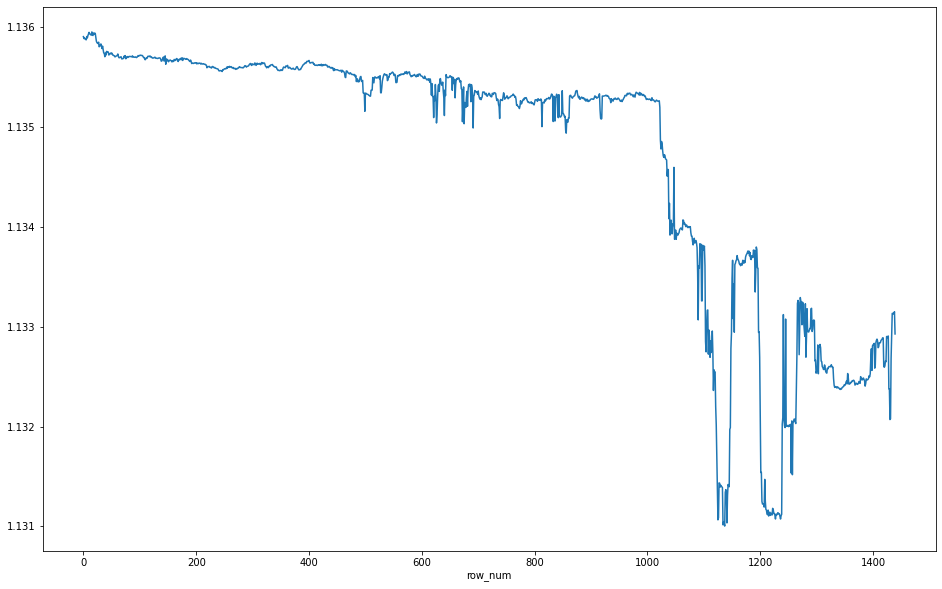

In [21]:
import matplotlib as mpl
mpl.rcParams['savefig.dpi'] = 120

ax = y_pred.plot(figsize = (16, 10)) 